first import libaray

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

open file and put path in your device

In [2]:
# open file 
import os
print(os.listdir("E:\\skin_project")) # open file
print("-----------------------------------------")

['archive', 'ISIC_2019_Training_GroundTruth.csv', 'ISIC_2019_Training_Metadata.csv']
-----------------------------------------


In [3]:
### path
trainpath = 'E:\\skin_project\\archive\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train'
testpath = 'E:\\skin_project\\archive\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test'
predpath = 'E:\\skin_project\\archive\\Skin cancer ISIC The International Skin Imaging Collaboration\\pred'
data1path = 'E:\\skin_project\ISIC_2019_Training_GroundTruth.csv'
data2path = 'E:\\skin_project\ISIC_2019_Training_Metadata.csv'


download excel data and anlysis

In [4]:
# download data2 and analysis
data2 = pd.read_csv(data2path, header = 0)
print(data2.head(20)) # first of 20 column of data
print("-----------------------------------------")

                       image  age_approx anatom_site_general lesion_id     sex
0               ISIC_0000000        55.0      anterior torso       NaN  female
1               ISIC_0000001        30.0      anterior torso       NaN  female
2               ISIC_0000002        60.0     upper extremity       NaN  female
3               ISIC_0000003        30.0     upper extremity       NaN    male
4               ISIC_0000004        80.0     posterior torso       NaN    male
5               ISIC_0000006        25.0     posterior torso       NaN  female
6               ISIC_0000007        25.0     posterior torso       NaN  female
7               ISIC_0000008        30.0      anterior torso       NaN  female
8               ISIC_0000009        30.0      anterior torso       NaN  female
9               ISIC_0000010        35.0     posterior torso       NaN  female
10              ISIC_0000011        35.0     lower extremity       NaN  female
11              ISIC_0000012        30.0     posteri

In [5]:
print(data2.tail(20)) # last of 20 culomn of data
print("-----------------------------------------")

              image  age_approx anatom_site_general    lesion_id     sex
25311  ISIC_0073224        55.0           head/neck  BCN_0001014  female
25312  ISIC_0073225        55.0     lower extremity  BCN_0000286  female
25313  ISIC_0073227        85.0           head/neck  BCN_0004289    male
25314  ISIC_0073228        70.0      anterior torso  BCN_0003360  female
25315  ISIC_0073229        55.0      anterior torso  BCN_0000063    male
25316  ISIC_0073231        55.0      anterior torso  BCN_0005418  female
25317  ISIC_0073232        45.0     lower extremity  BCN_0000185    male
25318  ISIC_0073235        45.0      anterior torso  BCN_0001429  female
25319  ISIC_0073237        45.0     lower extremity  BCN_0001536  female
25320  ISIC_0073238        45.0     upper extremity  BCN_0005240  female
25321  ISIC_0073240        45.0     lower extremity  BCN_0002417  female
25322  ISIC_0073241        60.0         palms/soles  BCN_0004405    male
25323  ISIC_0073244        15.0     lower extremity

In [6]:
print(data2.describe()) # information of number
print("-----------------------------------------")

         age_approx
count  24894.000000
mean      54.028481
std       18.130971
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max       85.000000
-----------------------------------------


In [7]:
print(data2.info()) # information of data
print("-----------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB
None
-----------------------------------------


In [8]:
print(data2.corr())
print("-----------------------------------------")

            age_approx
age_approx         1.0
-----------------------------------------


<AxesSubplot:>

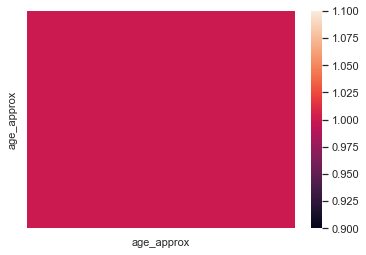

In [9]:
sns.heatmap(data2.corr()) # plot corraletion of dataframe

In [10]:
# download data2 and analysis
data1 = pd.read_csv(data1path, header = 0)
print(data1.head(20)) # first of 20 column of data
print("-----------------------------------------")

                       image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0               ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1               ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2               ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3               ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4               ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
5               ISIC_0000006  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
6               ISIC_0000007  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
7               ISIC_0000008  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
8               ISIC_0000009  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
9               ISIC_0000010  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
10              ISIC_0000011  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
11              ISIC_0000012  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
12              ISIC_0000

In [11]:
print(data1.tail(20)) # last of 20 culomn of data
print("-----------------------------------------")

              image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
25311  ISIC_0073224  0.0  0.0  0.0  1.0  0.0  0.0   0.0  0.0  0.0
25312  ISIC_0073225  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25313  ISIC_0073227  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25314  ISIC_0073228  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25315  ISIC_0073229  0.0  0.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0
25316  ISIC_0073231  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25317  ISIC_0073232  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25318  ISIC_0073235  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0  0.0
25319  ISIC_0073237  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25320  ISIC_0073238  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25321  ISIC_0073240  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25322  ISIC_0073241  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25323  ISIC_0073244  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25324  ISIC_0073245  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25325  ISI

In [12]:
print(data1.info()) # last of 20 culomn of data
print("-----------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
None
-----------------------------------------


In [13]:
print(data1.describe()) # last of 20 culomn of data
print("-----------------------------------------")

                MEL            NV           BCC            AK           BKL  \
count  25331.000000  25331.000000  25331.000000  25331.000000  25331.000000   
mean       0.178516      0.508270      0.131183      0.034227      0.103588   
std        0.382954      0.499941      0.337607      0.181815      0.304732   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                 DF          VASC           SCC      UNK  
count  25331.000000  25331.000000  25331.000000  25331.0  
mean       0.009435      0.009988      0.024792      0.0  
std        0.096677      0.099440      0.155493      0.0  
min        0.000000      0.000000      0.000000     

In [14]:
print(data1.corr())
print("-----------------------------------------")

           MEL        NV       BCC        AK       BKL        DF      VASC  \
MEL   1.000000 -0.473941 -0.181140 -0.087758 -0.158468 -0.045496 -0.046822   
NV   -0.473941  1.000000 -0.395056 -0.191395 -0.345610 -0.099224 -0.102117   
BCC  -0.181140 -0.395056  1.000000 -0.073151 -0.132092 -0.037923 -0.039029   
AK   -0.087758 -0.191395 -0.073151  1.000000 -0.063995 -0.018373 -0.018909   
BKL  -0.158468 -0.345610 -0.132092 -0.063995  1.000000 -0.033177 -0.034144   
DF   -0.045496 -0.099224 -0.037923 -0.018373 -0.033177  1.000000 -0.009803   
VASC -0.046822 -0.102117 -0.039029 -0.018909 -0.034144 -0.009803  1.000000   
SCC  -0.074327 -0.162102 -0.061955 -0.030016 -0.054201 -0.015561 -0.016015   
UNK        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

           SCC  UNK  
MEL  -0.074327  NaN  
NV   -0.162102  NaN  
BCC  -0.061955  NaN  
AK   -0.030016  NaN  
BKL  -0.054201  NaN  
DF   -0.015561  NaN  
VASC -0.016015  NaN  
SCC   1.000000  NaN  
UNK        NaN  NaN  

<AxesSubplot:>

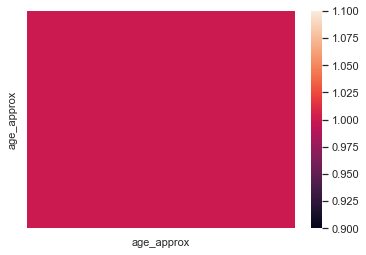

In [15]:
sns.heatmap(data2.corr()) # plot corraletion of dataframe

open file and count number of images in each class

In [16]:
results2 = []
for folder in  os.listdir(trainpath + '\\') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( trainpath +'\\' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For training data , found {len(files)} in folder {folder}')
pd.DataFrame(results2)

For training data , found 114 in folder actinic keratosis
For training data , found 376 in folder basal cell carcinoma
For training data , found 95 in folder dermatofibroma
For training data , found 438 in folder melanoma
For training data , found 357 in folder nevus
For training data , found 462 in folder pigmented benign keratosis
For training data , found 77 in folder seborrheic keratosis
For training data , found 181 in folder squamous cell carcinoma
For training data , found 139 in folder vascular lesion


disease  count_images
0           actinic keratosis           114
1        basal cell carcinoma           376
2              dermatofibroma            95
3                    melanoma           438
4                       nevus           357
5  pigmented benign keratosis           462
6        seborrheic keratosis            77
7     squamous cell carcinoma           181
8             vascular lesion           139

In [17]:
results2 = []
for folder in  os.listdir(testpath + '\\') : 
    dies_name_count = {}
    files = gb.glob(pathname= str( testpath +'\\' + folder + '/*.jpg'))
    dies_name_count['disease']=folder
    dies_name_count['count_images']=len(files)
    results2.append(dies_name_count)
    print(f'For testing data , found {len(files)} in folder {folder}')
pd.DataFrame(results2)

For testing data , found 16 in folder actinic keratosis
For testing data , found 16 in folder basal cell carcinoma
For testing data , found 16 in folder dermatofibroma
For testing data , found 16 in folder melanoma
For testing data , found 16 in folder nevus
For testing data , found 16 in folder pigmented benign keratosis
For testing data , found 3 in folder seborrheic keratosis
For testing data , found 16 in folder squamous cell carcinoma
For testing data , found 3 in folder vascular lesion


disease  count_images
0           actinic keratosis            16
1        basal cell carcinoma            16
2              dermatofibroma            16
3                    melanoma            16
4                       nevus            16
5  pigmented benign keratosis            16
6        seborrheic keratosis             3
7     squamous cell carcinoma            16
8             vascular lesion             3

In [18]:
code = {'actinic keratosis':0 ,'basal cell carcinoma':1,'dermatofibroma':2,'melanoma':3,'nevus':4,'pigmented benign keratosis':5,'seborrheic keratosis':6,'squamous cell carcinoma':7,'vascular lesion':8}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

read size of images

In [19]:
size = []
for folder in  os.listdir(trainpath +'\\') : 
    files = gb.glob(pathname= str( trainpath +'\\' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(450, 600, 3)      1443
(768, 1024, 3)      393
(2304, 3072, 3)      84
(576, 767, 3)        80
(802, 919, 3)        60
                   ... 
(1603, 2198, 3)       1
(1936, 1936, 3)       1
(1296, 1936, 3)       1
(649, 965, 3)         1
(680, 853, 3)         1
Length: 76, dtype: int64

In [20]:
size = []
for folder in  os.listdir(testpath +'\\') : 
    files = gb.glob(pathname= str( testpath +'\\' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(450, 600, 3)      69
(767, 1022, 3)     17
(1129, 1504, 3)    14
(768, 1024, 3)      5
(4419, 6668, 3)     2
(1936, 1936, 3)     1
(2848, 4288, 3)     1
(4479, 6668, 3)     1
(4459, 6648, 3)     1
(4380, 6601, 3)     1
(4439, 6648, 3)     1
(4439, 6688, 3)     1
(1129, 1503, 3)     1
(4399, 6668, 3)     1
(4421, 6641, 3)     1
(4391, 6641, 3)     1
dtype: int64

In [21]:
size = []
files = gb.glob(pathname= str(predpath +'/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(450, 600, 3)      27
(1129, 1504, 3)     4
(4419, 6668, 3)     2
(4399, 6668, 3)     1
(4421, 6641, 3)     1
(4391, 6641, 3)     1
dtype: int64

resize of images

In [22]:
s = 150

In [23]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'\\') : 
    files = gb.glob(pathname= str( trainpath +'\\' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [24]:
print(f'we have {len(X_train)} items in X_train')

we have 2239 items in X_train


smaples of images

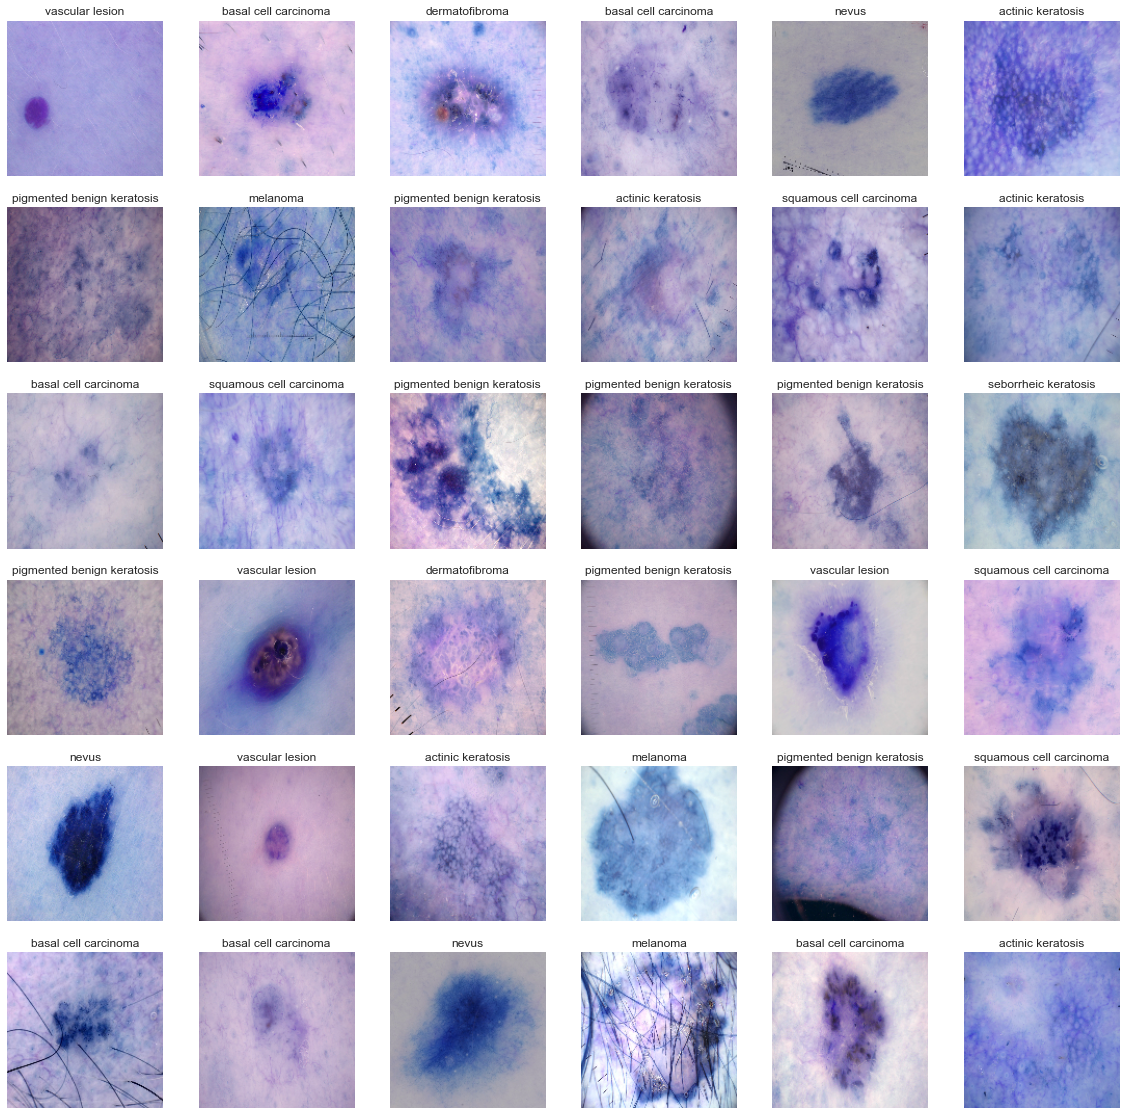

In [25]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [26]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'\\') : 
    files = gb.glob(pathname= str(testpath + '\\' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])

In [27]:
print(f'we have {len(X_test)} items in X_test')

we have 118 items in X_test


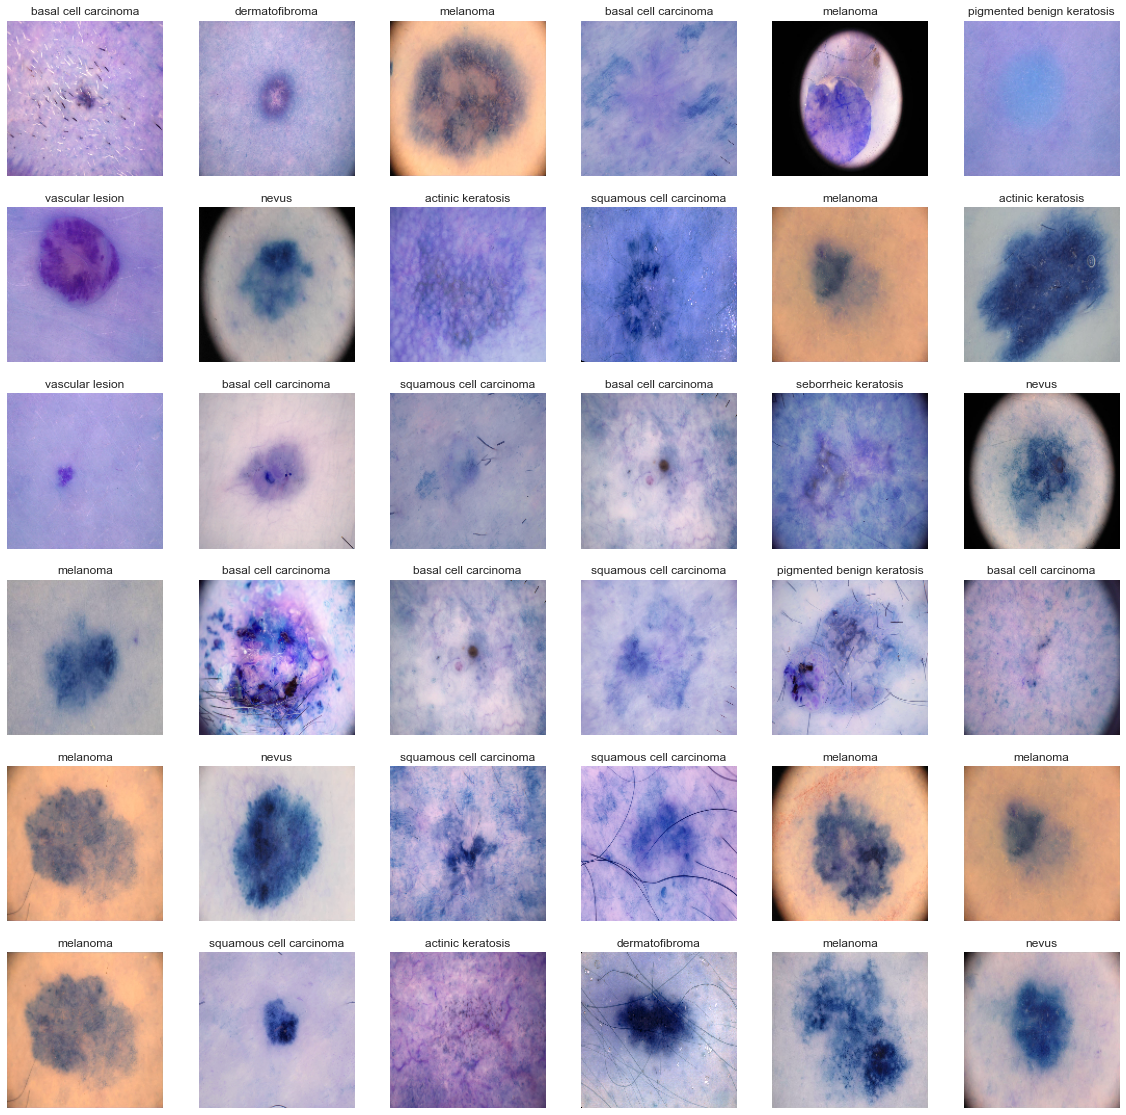

In [28]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [29]:
X_pred = []
files = gb.glob(pathname= str(predpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))      

In [30]:
print(f'we have {len(X_pred)} items in X_pred')

we have 36 items in X_pred


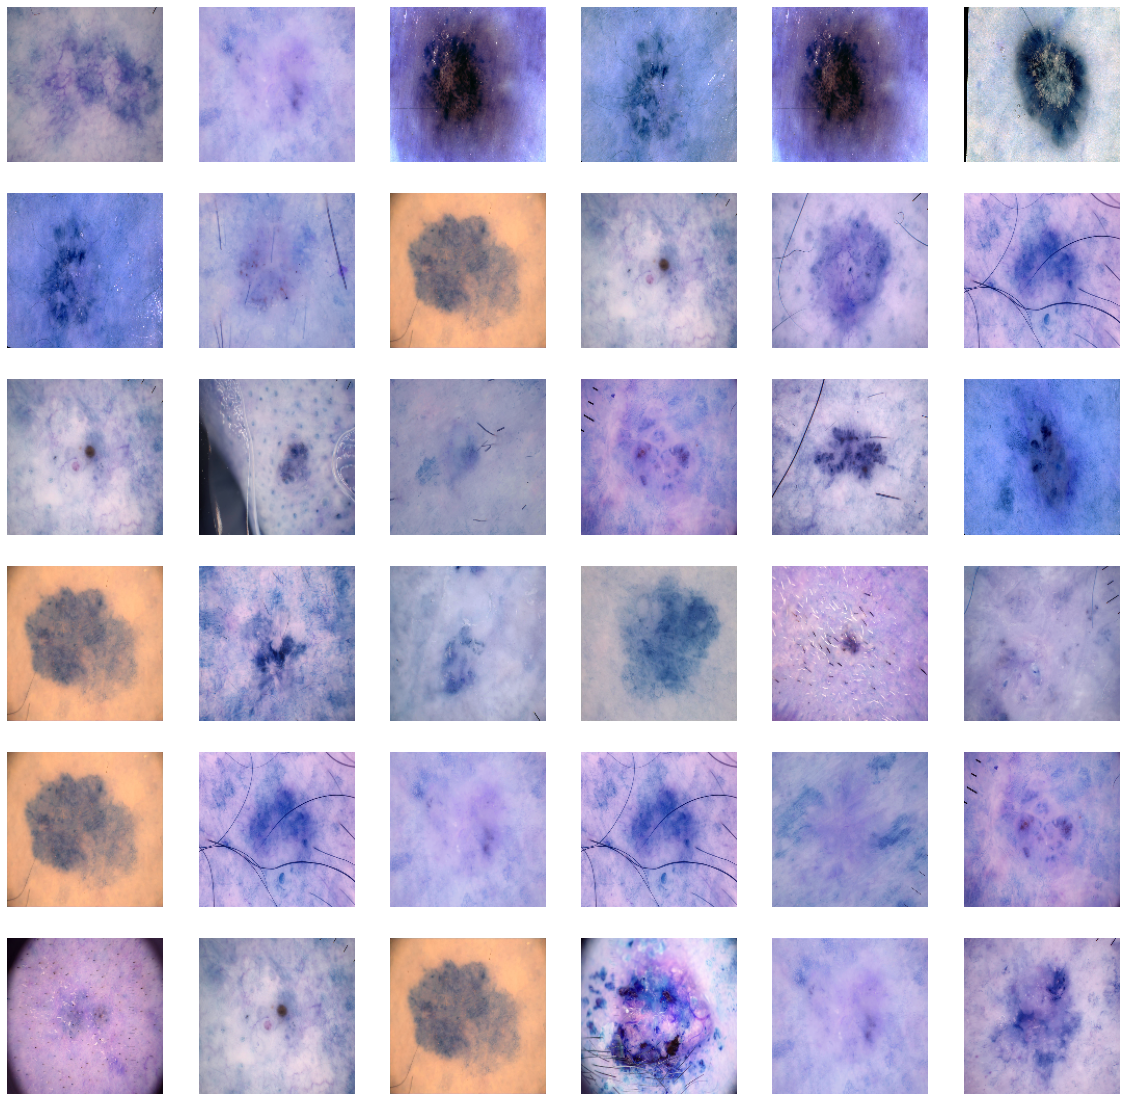

In [31]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

Model in cnn

In [32]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (2239, 150, 150, 3)
X_test shape  is (118, 150, 150, 3)
X_pred shape  is (36, 150, 150, 3)
y_train shape  is (2239,)
y_test shape  is (118,)


In [33]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(9,activation='softmax') ,    
        ])

In [34]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 150)     270150    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 150)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        36050     
                                   

In [36]:
epochs = 40
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=4,verbose=1)

Epoch 1/40
560/560 [==============================] - 543s 966ms/step - loss: 2.2745 - accuracy: 0.1956
Epoch 2/40
560/560 [==============================] - 537s 958ms/step - loss: 2.0607 - accuracy: 0.1898
Epoch 3/40
560/560 [==============================] - 537s 960ms/step - loss: 2.0372 - accuracy: 0.1965
Epoch 4/40
560/560 [==============================] - 539s 962ms/step - loss: 2.0254 - accuracy: 0.1970
Epoch 5/40
560/560 [==============================] - 538s 961ms/step - loss: 2.0290 - accuracy: 0.1898
Epoch 6/40
560/560 [==============================] - 539s 963ms/step - loss: 2.0258 - accuracy: 0.2046
Epoch 7/40
560/560 [==============================] - 537s 960ms/step - loss: 2.0249 - accuracy: 0.1979
Epoch 8/40
560/560 [==============================] - 537s 959ms/step - loss: 2.0225 - accuracy: 0.2005
Epoch 9/40
560/560 [==============================] - 537s 960ms/step - loss: 2.0239 - accuracy: 0.2010
Epoch 10/40
560/560 [==============================] - 538s 960m

In [37]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

4/4 [==============================] - 9s 2s/step - loss: 2.2473 - accuracy: 0.1356
Test Loss is 2.247251033782959
Test Accuracy is 0.1355932205915451


In [38]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

4/4 [==============================] - 9s 2s/step
Prediction Shape is (118, 9)


In [39]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

2/2 [==============================] - 3s 302ms/step
Prediction Shape is (36, 9)


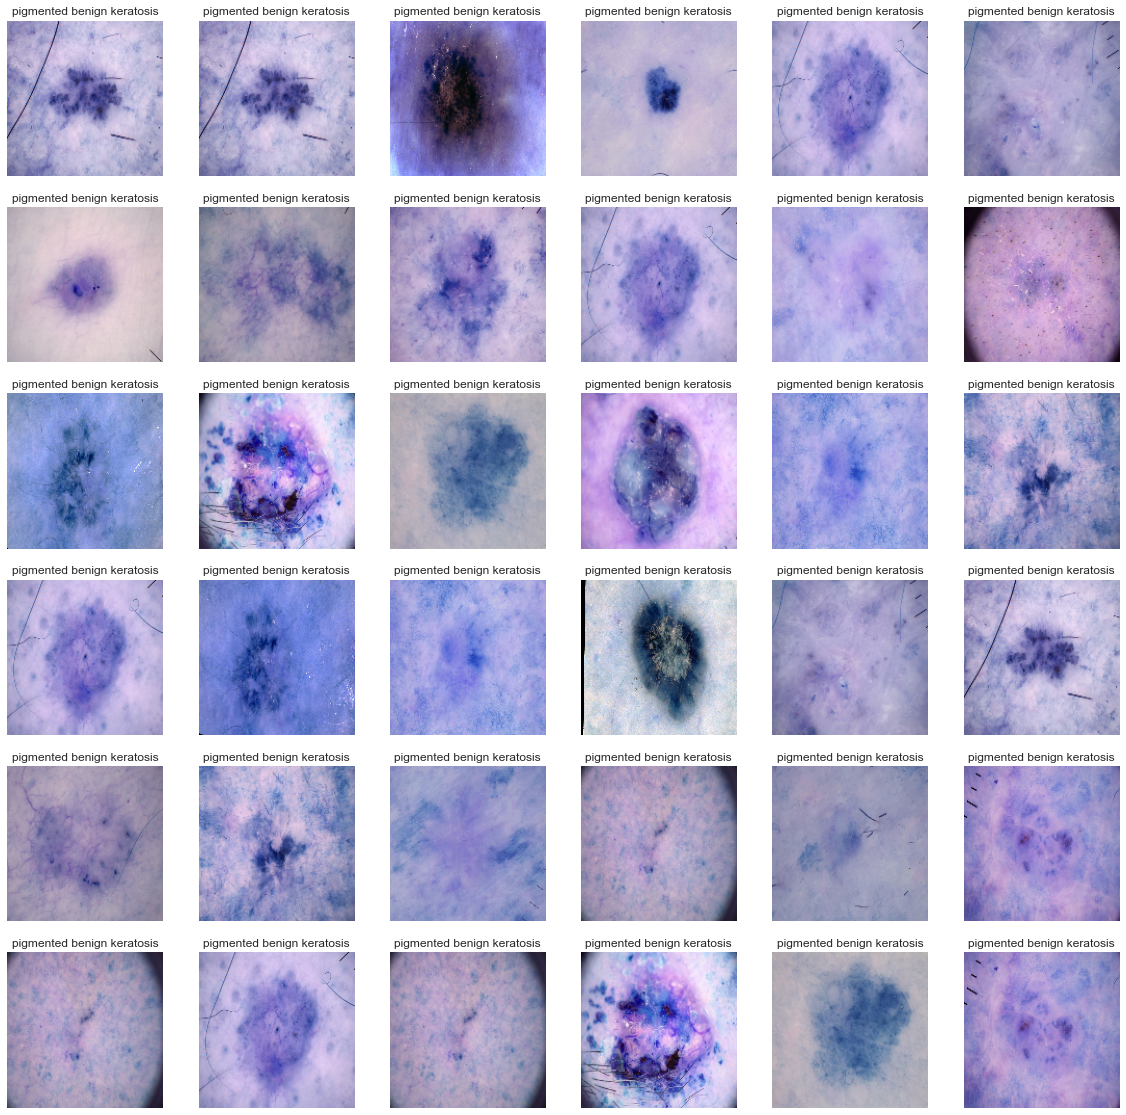

In [41]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))

In [ ]:
epochs = 15
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=32,verbose=1)

Epoch 1/15
35/70 [==============>...............] - ETA: 4:38 - loss: 2.0093 - accuracy: 0.2098